In [3]:
from transformers import GPT2LMHeadModel

/home/anchorpad/conda_env/nlp-learning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2') # 124M model
sd_hf = model_hf.state_dict() # raw tensor

for k,v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
# TOKEN EMBEDDINGS: transformer.wte.weight torch.Size([50257, 768])
# GPT2 has 50k tokens, each 768dim embedding

# POSITION EMBEDDINGS: transformer.wpe.weight torch.Size([1024, 768])
# GPT2 has max 1024 sequence length, each position has a 768dim learned embedding for attention

# lets look at 1 of the position embedding only
sd_hf['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

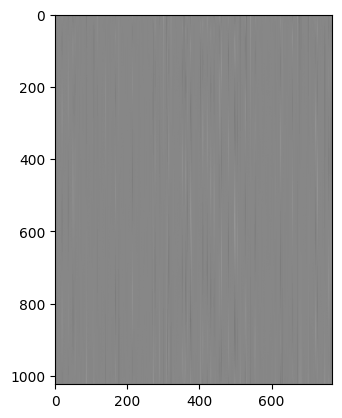

In [6]:
# plt the position embedding
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf['transformer.wpe.weight'], cmap='gray')

the position embeddings has structure.

position embedding is sinusoid function of position [0, 1024].  each row of 768 vector represents the position, then passed to transformer for attention.

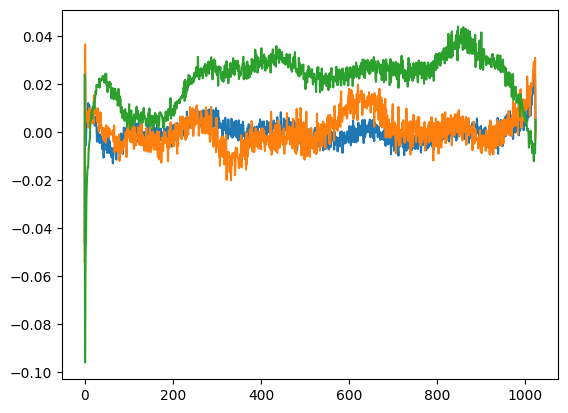

In [7]:
# looking at a couple channels for all positions
plt.plot(sd_hf['transformer.wpe.weight'][:, 150])
plt.plot(sd_hf['transformer.wpe.weight'][:, 200])
plt.plot(sd_hf['transformer.wpe.weight'][:, 250])

the <span style='color:green'>green</span> position embedding
- doesnt care about position 0
- cares a lot about position [200-800]
- who knows why

the plot is very jaggy/jumpy, this is an indication that the model is under trained
- plot should be smoother for a more-trained model
- the embedding is initialized as random noise
- during training it learns structure and becomes less noisy

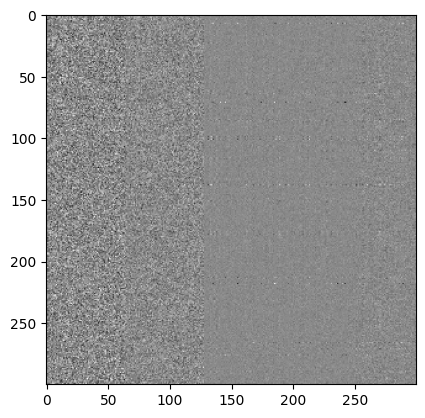

In [6]:
# we can look at one of the layer's weights
plt.imshow(sd_hf['transformer.h.1.attn.c_attn.weight'][:300,:300], cmap='gray')

In [8]:
# now sample from the model
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, truncation=True, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [20]:
model_hf.state_dict().keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'transformer.h.2.ln_1.weight', 'transformer.h.2.ln_1.bias', 'transformer.h.2.attn.c_attn.weight', 'transformer.h.2.attn.

## Training

In [9]:
# tiny shakespear dataset
with open('tiny-shakespere.txt', 'r') as f:
    text = f.read()
data = text[:1000] # first 1k chars
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [10]:
# gpt2 tokenizer has roughly 3:1 ratio compression
# so 1000 chars -> 300 tokens
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [11]:
# reorganize data into (B,T)
import torch
# fetch 1 extra token as the label for last token
buf = torch.tensor(tokens[:24 + 1])
# B=4, T=6
# skip the last token for inputs
x = buf[:-1].view(4, 6)
# skip the 1st token for labels
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


### weight sharing scheme

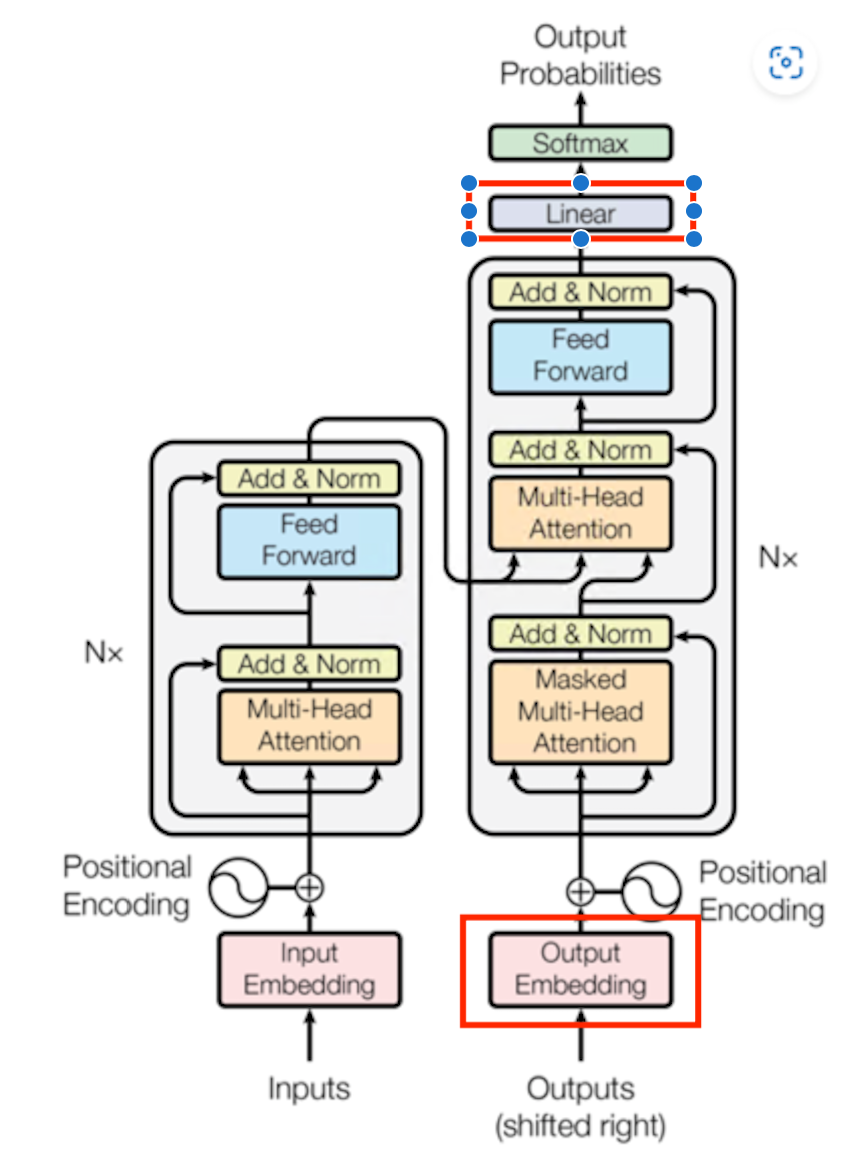

In [12]:
# notice that the parameters in red have the same shape
print(sd_hf['lm_head.weight'].shape) # output embeddings
print(sd_hf['transformer.wte.weight'].shape) # schematic embeddings

torch.Size([50257, 768])
torch.Size([50257, 768])


In [14]:
# pair wise comparison of all parameters are the same
(sd_hf['lm_head.weight'] == sd_hf['transformer.wte.weight']).all()

tensor(True)

In [15]:
# points to the same memory buffer
print(sd_hf['lm_head.weight'].data_ptr())
print(sd_hf['transformer.wte.weight'].data_ptr())

140132154617920
140132154617920


so the 2 parameters buffers are actually the same buffer in memory.

this is implemented in the original `atthention is all you need` paper.

one intuition why the 2 weights should be similar/same is that
- words that are similar should have **similar word embeddings**
- wirds that are similar can be used *interchangably*, which means that have *similar probabilities*, therefore similar **semantic embedding**

### Initialization of residual connection scaling

In [16]:
# standard deviation grows in multiple residual stream
x = torch.zeros(768)
n = 100 # 100 layers
for i in range(n):
    # and residual connection to x, residual connection is direction addition
    x += torch.randn(768)

# check std after 100 layers
print(x.std())

tensor(10.2067)


the standard deviation of 100 separate distribution of `normal(0,1)` sum is no longer 1.

to normalize the end result, we need to scale all parameters by $\frac{1}{\sqrt{N}}$, N=number of layers

In [17]:
# do this again with scaling factor
x = torch.zeros(768)
n = 100 # 100 layers
for i in range(n):
    # and residual connection to x, residual connection is direction addition
    x += n**-0.5 *torch.randn(768)

# check std after 100 layers, should be close to 1
print(x.std())

tensor(0.9847)
